# Group Information

*   Animesh Raj : 11940120
*   Puja Bansal : 11940910


---
DS250 1C Assignment

# Initilalizing Libraries

**Importing Libraries**

In [35]:
import numpy as np
import pandas as pd
import cv2
import os
import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
import math
from decimal import Decimal
import seaborn as sns

# Dataset Import

**Kaggle Dataset Import**

In [36]:
#! pip install -q kaggle
#from google.colab import files
#files.upload()
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

In [37]:
#! kaggle datasets download -d itachi9604/disease-symptom-description-dataset

In [38]:
#! unzip disease-symptom-description-dataset.zip

# Data Prepossesing

**Importing dataset.csv file**

In [39]:
df = pd.read_csv('dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


**Remove the white space from all the columns**

In [41]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Replace all NaN values with 0**

In [42]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Working on prepossessed data

**Creating list of symptoms for each row**

In [43]:
# creating arrays of symptoms in symptom attribute column
records_length = df['Disease']
df['Symptoms'] = 0

# extracting all column values from each row (throwing away null values)
for i in range(len(records_length)):
    symptom_row_list = df.iloc[i].values
    symptom_row_list = symptom_row_list.tolist()
    if 0 in symptom_row_list:
      df["Symptoms"][i] = symptom_row_list[1:symptom_row_list.index(0)]
    else:
      df["Symptoms"][i] = symptom_row_list[1:]
df.head()

C:\Users\PUJABA~1\AppData\Local\Temp/ipykernel_18768/2709426585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Symptoms"][i] = symptom_row_list[1:symptom_row_list.index(0)]


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions, dis..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, nodal_skin_eruptions, dischromic _pa..."
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, dischromic _patches]"
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions]"


**Importing Symptom-severity.csv file**

In [44]:
df1 = pd.read_csv('Symptom-severity.csv')
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [45]:
# obtaining array of unique symptoms from Symptom-severity dataset
symptoms_unique = df1['Symptom'].unique()
symptoms_unique
#len(df1['Symptom'])

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [46]:
len(symptoms_unique)

132

**Creating binary attribute for symptoms table**

In [47]:
# creating an empty table intializing all values to 0
symptoms_table = pd.DataFrame(columns = symptoms_unique,index = df.index)
symptoms_table = symptoms_table.fillna(0)
symptoms_table.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# comparing symptoms table with dataset.csv
symptoms_table["Symptoms"] = df["Symptoms"]
for i in symptoms_unique:
    symptoms_table[i] = symptoms_table.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)

C:\Users\PUJABA~1\AppData\Local\Temp/ipykernel_18768/851763033.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  symptoms_table["Symptoms"] = df["Symptoms"]


In [49]:
# binary attribute for symptoms table
symptoms_table["Disease"] = df["Disease"]
symptoms = symptoms_table.drop("Symptoms",axis=1)
symptoms.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


**Training and Testing Model**

In [50]:
# testing and training of model
train, test = train_test_split(symptoms,test_size=0.2)
X_train = train.drop("Disease",axis=1)
y_train = train["Disease"].copy()
X_test = test.drop("Disease",axis=1)
y_test = test["Disease"].copy()

In [58]:
# DT Classifier

# without decision tree
#dt = DecisionTreeClassifier()

# with decision tree
#dt = DecisionTreeClassifier(criterion = 'entropy', random_state=24) # print whole decision tree
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7) # set max depth of tree (at what depth you want to see)

dt = dt.fit(X_train, y_train)
# prediction of labels for the test data
dt_pred = dt.predict(X_test)

**Confusion Matrix**

In [59]:
result = confusion_matrix(y_test, dt_pred)
print('Confusion Matrix : \n', result)
print('\nAccuracy =', accuracy_score(y_test, dt_pred)*100,'%')
print('Precision =', precision_score(y_test, dt_pred, average="macro")*100,'%')
print('Recall =', recall_score(y_test, dt_pred, average="macro")*100,'%')    
print('F1-score =', f1_score(y_test, dt_pred, average='macro')*100,'%')

Confusion Matrix : 
 [[19  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 25]]

Accuracy = 85.0609756097561 %
Precision = 89.5391882677929 %
Recall = 86.11887843369917 %
F1-score = 86.61653705260393 %


C:\Users\Puja Bansal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
matrix = classification_report(dt_pred, y_test)
print('Classification report : \n',matrix)

Classification report : 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.95      0.90      0.93        21
                                   AIDS       0.95      0.95      0.95        38
                                   Acne       0.83      1.00      0.91        25
                    Alcoholic hepatitis       0.88      0.68      0.77        22
                                Allergy       1.00      0.20      0.33       128
                              Arthritis       0.86      1.00      0.93        19
                       Bronchial Asthma       1.00      0.68      0.81        40
                   Cervical spondylosis       0.68      1.00      0.81        13
                            Chicken pox       1.00      0.93      0.96        29
                    Chronic cholestasis       0.88      1.00      0.94        15
                            Common Cold       0.73      1.00      0.84        24
 

C:\Users\Puja Bansal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puja Bansal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puja Bansal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# Plots

**Heat Map plot**

<AxesSubplot:>

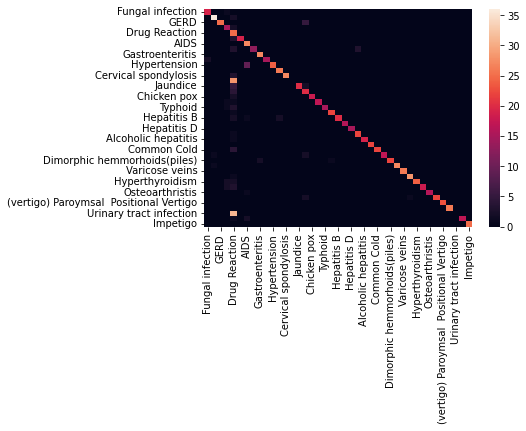

In [61]:
df_cm = pd.DataFrame(result, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

**Decision Tree Plot**

[Text(0.6046195652173914, 0.9375, 'X[14] <= 0.5\nentropy = 5.356\nsamples = 3936\nvalue = [100, 82, 90, 103, 95, 98, 93, 101, 93, 103, 87\n94, 90, 92, 93, 96, 100, 101, 101, 97, 95, 104\n105, 97, 100, 98, 94, 100, 95, 92, 94, 91, 92\n97, 103, 95, 97, 94, 89, 100, 95]'),
 Text(0.3532608695652174, 0.8125, 'X[11] <= 0.5\nentropy = 4.774\nsamples = 2378\nvalue = [100, 82, 90, 103, 95, 98, 10, 101, 5, 103, 2, 3\n3, 92, 93, 96, 100, 101, 101, 5, 4, 5, 5, 97\n5, 5, 8, 100, 5, 92, 94, 91, 92, 97, 6, 95, 5\n0, 89, 5, 95]'),
 Text(0.18342391304347827, 0.6875, 'X[1] <= 0.5\nentropy = 4.255\nsamples = 1434\nvalue = [4, 82, 90, 4, 95, 98, 10, 101, 5, 6, 2, 0, 3\n92, 93, 96, 10, 11, 9, 5, 4, 0, 0, 97, 5, 0\n8, 100, 0, 5, 94, 91, 10, 3, 6, 95, 0, 0, 89\n5, 6]'),
 Text(0.12771739130434784, 0.5625, 'X[85] <= 0.5\nentropy = 3.969\nsamples = 986\nvalue = [4, 82, 6, 4, 95, 98, 10, 101, 0, 6, 2, 0, 3\n92, 7, 8, 10, 11, 9, 5, 4, 0, 0, 97, 5, 0, 8\n5, 0, 5, 94, 91, 10, 3, 6, 5, 0, 0, 89, 5, 6]'),
 Text(0.081

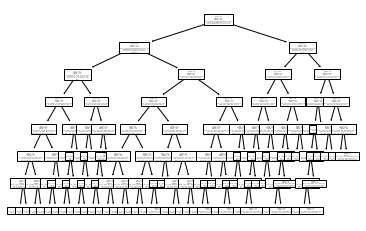

In [62]:
tree.plot_tree(dt)

In [63]:
import pickle
pickle.dump(symptoms_table , open('symptoms_table.pkl', 'wb'))
pickle.dump(dt , open('model.pkl', 'wb'))

Streamlit Working

In [64]:
! streamlit run script.py

^C
